# Introduction

For this project, the goal was to interpret data from the National Parks Service about endangered species in different parks. We wanted to perform a data analysis on the conservation statuses of these species and investigate to see if there were any particular patterns or themes ot the types of species that become endangered.

Some questions I would like to answer throughout this analysis:
- What is the most common animal amongst the parks?
- What is the distribution of conservation status?
- Are there certain species that are more likely to be endangered than another?
- Explore the relationship between number of observations and conservation status?

**Data sources:**

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

# Import Libraries and Files

In [3]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import csv files 

observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

# Describe the Data

In [5]:
# Describe the observations table by finding the shape, column types, and printing the head of the colunmn
print(f'Shape: {observations.shape} \n')
print(observations.dtypes)
observations.head()

Shape: (23296, 3) 

scientific_name    object
park_name          object
observations        int64
dtype: object


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
# Describe the species_info table by finding the shape, column types, and printing the head of the colunmn
print(f'Shape: {species_info.shape} \n')
print(species_info.dtypes)
species_info.head()

Shape: (5824, 4) 

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
# Find unique values for observations.park_name, species_info.category, and species_info.conservation_status
print(f'Unique Parks: {observations.park_name.unique()} ({observations.park_name.nunique()}) \n')
print(f'Unique Categories: {species_info.category.unique()}({species_info.category.nunique()}) \n')
print(f'Unique Conservation Status: {species_info.conservation_status.unique()}({species_info.conservation_status.nunique()}) \n')

Unique Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] (4) 

Unique Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant'](7) 

Unique Conservation Status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery'](4) 



In [8]:
# Groupby the same categories above
print(len(observations.park_name))
print(observations.groupby('park_name').size())
print('\n')

print(len(species_info.category))
print(species_info.groupby('category').size())
print('\n')

print(len(species_info.conservation_status))
print(species_info.groupby('conservation_status').size())

23296
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


5824
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


5824
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [9]:
# Find amount of NaN Data in conservation status
print(f'NaN status: {species_info.conservation_status.isna().sum()}')

NaN status: 5633


# Begin Analysis

### Question 1: What is the most common animal amongst the parks?

In [10]:
# For this we will use the observations table and find the total number of observations in each park
obersvations_per_animal = observations.groupby('scientific_name')['observations'].sum().reset_index()
obersvations_per_animal.sort_values(by='observations', ascending=False).reset_index(drop=True)

# This information below tells us the most common animal throughout all the parks is the Streptopelia Decaocto
# The least common is the Grus Americana 
# But now lets look for each individual park

,scientific_name,observations
0,Streptopelia decaocto,1785
1,Holcus lanatus,1780
2,Castor canadensis,1725
3,Hypochaeris radicata,1720
4,Puma concolor,1711
...,...,...
5536,Rana sierrae,144
5537,Noturus baileyi,143
5538,Vermivora bachmanii,141
5539,Canis rufus,137


In [42]:
# Finding common name
print(species_info[species_info.scientific_name == 'Streptopelia decaocto'])
print(species_info[species_info.scientific_name == 'Grus americana'])

# A Streptopelia Decaocto is also known as a Eurasian Collared-Dove

     category        scientific_name  \
3077     Bird  Streptopelia decaocto   
3140     Bird  Streptopelia decaocto   
4514     Bird  Streptopelia decaocto   

                                        common_names conservation_status  \
3077                          Eurasian Collared-Dove        Not Affected   
3140  Eurasian Collared Dove, Eurasian Collared-Dove        Not Affected   
4514                          Eurasian Collared Dove        Not Affected   

      risk_endangerment  
3077              False  
3140              False  
4514              False  
    category scientific_name    common_names conservation_status  \
173     Bird  Grus americana  Whooping Crane          Endangered   

     risk_endangerment  
173               True  


In [11]:
# Groupby park_name too
animals_per_park = animals_per_park = observations.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()
animals_per_park.sort_values('observations', ascending = False)

# Group by 'park_name' and find the top 5 animals based on the sum of 'observations' in each park
top_5_animals_per_park = animals_per_park.groupby('park_name').apply(lambda group: group.nlargest(5, 'observations')).reset_index(drop=True)
top_5_animals_per_park

,scientific_name,park_name,observations
0,Columba livia,Bryce National Park,339
1,Puma concolor,Bryce National Park,311
2,Avena sativa,Bryce National Park,303
3,Streptopelia decaocto,Bryce National Park,301
4,Myotis lucifugus,Bryce National Park,298
5,Streptopelia decaocto,Great Smoky Mountains National Park,256
6,Procyon lotor,Great Smoky Mountains National Park,247
7,Castor canadensis,Great Smoky Mountains National Park,243
8,Puma concolor,Great Smoky Mountains National Park,239
9,Fragaria virginiana,Great Smoky Mountains National Park,217


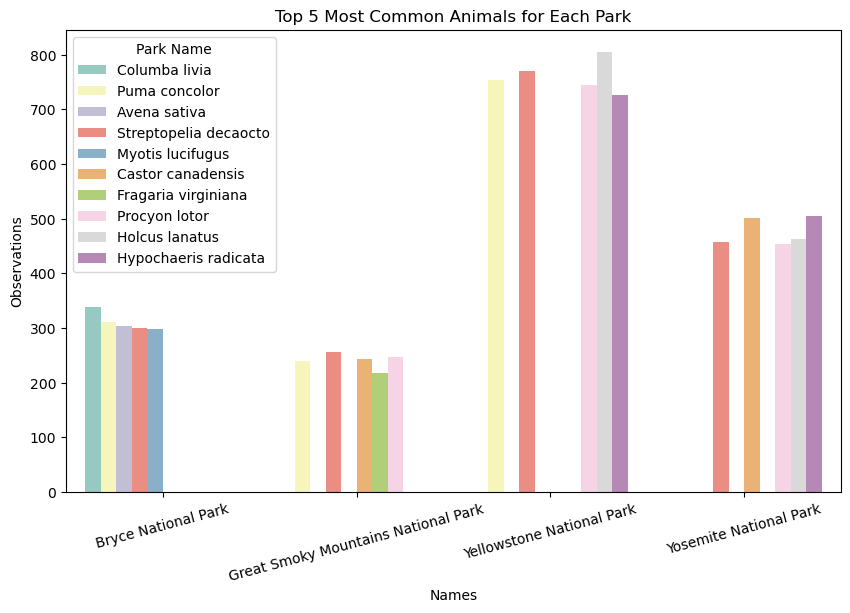

<Figure size 640x480 with 0 Axes>

In [12]:
# Sort the data by 'park_name' to group the parks together
top_5_animals_per_park = top_5_animals_per_park.sort_values('park_name')

plt.figure(figsize=(10, 6))
sns.barplot(x='park_name', y='observations', data=top_5_animals_per_park, hue='scientific_name', palette='Set3')

# A Plt basics
plt.title('Top 5 Most Common Animals for Each Park')
plt.xlabel('Names')
plt.ylabel('Observations')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.legend(title='Park Name', loc='upper left')  # Move the legend outside the plot
plt.show()
plt.clf()

##### Bonus Question: Which park has the most total observations?

In [13]:
# Groupby park and observation and sort in descending order
obersvations_per_park = observations.groupby('park_name')['observations'].sum().reset_index()
obersvations_per_park.sort_values('observations', ascending = False).reset_index(drop=True)

# The winner is Yellowstone National Park!

,park_name,observations
0,Yellowstone National Park,1443562
1,Yosemite National Park,863332
2,Bryce National Park,576025
3,Great Smoky Mountains National Park,431820


### Question 2: What is the distribution of conservation status?


In [14]:
# The NaN values seem to be animals that are not impacted, so we will fill the NaN values with 'Not Affected'
species_info.fillna('Not Affected', inplace=True)
# Print new groupby to double check
species_info.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Not Affected          5633
Species of Concern     161
Threatened              10
dtype: int64

In [15]:
# Let's now see how these vary across species
status_for_species = species_info.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
status_for_species.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Not Affected,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Species Count by Conservation Status and Category')

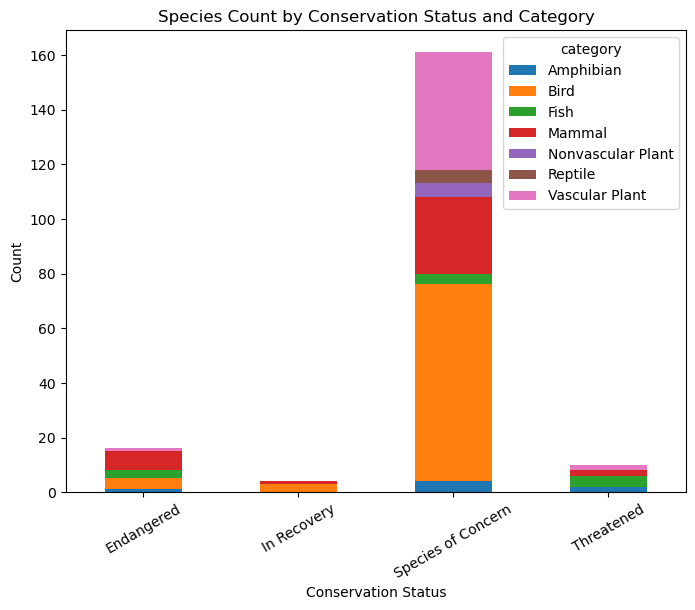

In [16]:
# Remove Not Affected Category for better visualization
updated_status_for_species = status_for_species.drop('Not Affected', axis=0)

# Create a visual for the data above
updated_status_for_species.plot(kind='bar', stacked=True, figsize=(8, 6))

# Plt Basics
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation = 30)
plt.title('Species Count by Conservation Status and Category')

### Question 3: Are there certain species that are more likely to be endangered than another?


In [17]:
# Add column that determines if the animal risks endangerment (If 'Not Affected' than True)
species_info['risk_endangerment'] = species_info.conservation_status != 'Not Affected'

# Find how many of each category risks endangerment
groupby_risk = species_info.groupby(['category', 'risk_endangerment'])['scientific_name'].count().reset_index()
groupby_risk = groupby_risk.pivot(columns='risk_endangerment', index='category', values='scientific_name')
groupby_risk

# Change the table to add percent so we can tell what percentage of each category risks endangerment 
groupby_risk['percent_at_risk'] = round(groupby_risk[True] / (groupby_risk[True] + groupby_risk[False]) * 100, 3)
groupby_risk

risk_endangerment,False,True,percent_at_risk
category,,,
Amphibian,73,7,8.750
Bird,442,79,15.163
Fish,116,11,8.661
Mammal,176,38,17.757
Nonvascular Plant,328,5,1.502
Reptile,74,5,6.329
Vascular Plant,4424,46,1.029


### Question 4: Explore the relationship between number of observations and conservation status?

In [19]:
# Lets first create a combined table 
combined = observations.merge(species_info)
combined

,scientific_name,park_name,observations,category,common_names,conservation_status,risk_endangerment
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Affected,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Affected,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Affected,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Affected,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Affected,False
...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,Not Affected,False
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",Not Affected,False
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",Not Affected,False
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",Not Affected,False


In [20]:
combined.conservation_status.unique()

array(['Not Affected', 'Species of Concern', 'Threatened', 'Endangered',
       'In Recovery'], dtype=object)

In [26]:
# With this new table lets use our variables to create boxplot plots

# Start by creating a group for each conservation status 
not_affected_status = combined[combined.conservation_status == 'Not Affected']
concern_status = combined[combined.conservation_status == 'Species of Concern']
threatened_status = combined[combined.conservation_status == 'Threatened']
endangered_status = combined[combined.conservation_status == 'Endangered']
in_recovery_status = combined[combined.conservation_status == 'In Recovery']

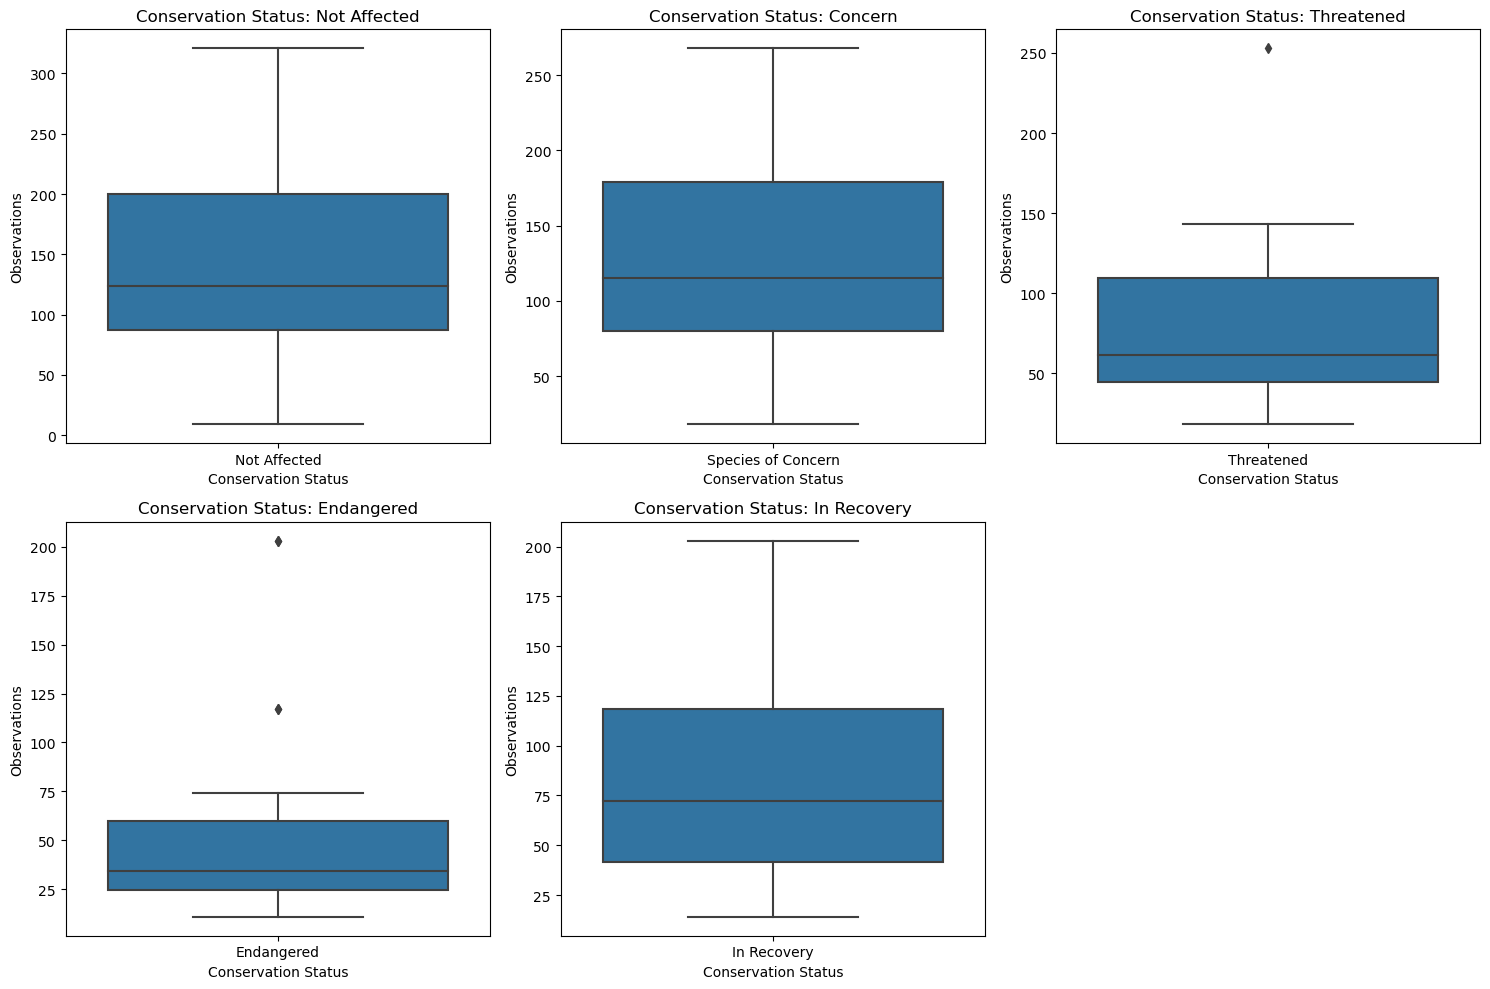

<Figure size 640x480 with 0 Axes>

In [32]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the five boxplots
plt.subplot(2, 3, 1)
sns.boxplot(x="conservation_status", y="observations", data=not_affected_status)
plt.title("Conservation Status: Not Affected")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")

plt.subplot(2, 3, 2)
sns.boxplot(x="conservation_status", y="observations", data=concern_status)
plt.title("Conservation Status: Concerned")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")

plt.subplot(2, 3, 3)
sns.boxplot(x="conservation_status", y="observations", data=threatened_status)
plt.title("Conservation Status: Threatened")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")

plt.subplot(2, 3, 4)
sns.boxplot(x="conservation_status", y="observations", data=endangered_status)
plt.title("Conservation Status: Endangered")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")

plt.subplot(2, 3, 5)
sns.boxplot(x="conservation_status", y="observations", data=in_recovery_status)
plt.title("Conservation Status: In Recovery")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")

plt.tight_layout()
plt.show()
plt.clf()

##### Bonus Question: Does the relationship differeniate from park to park?

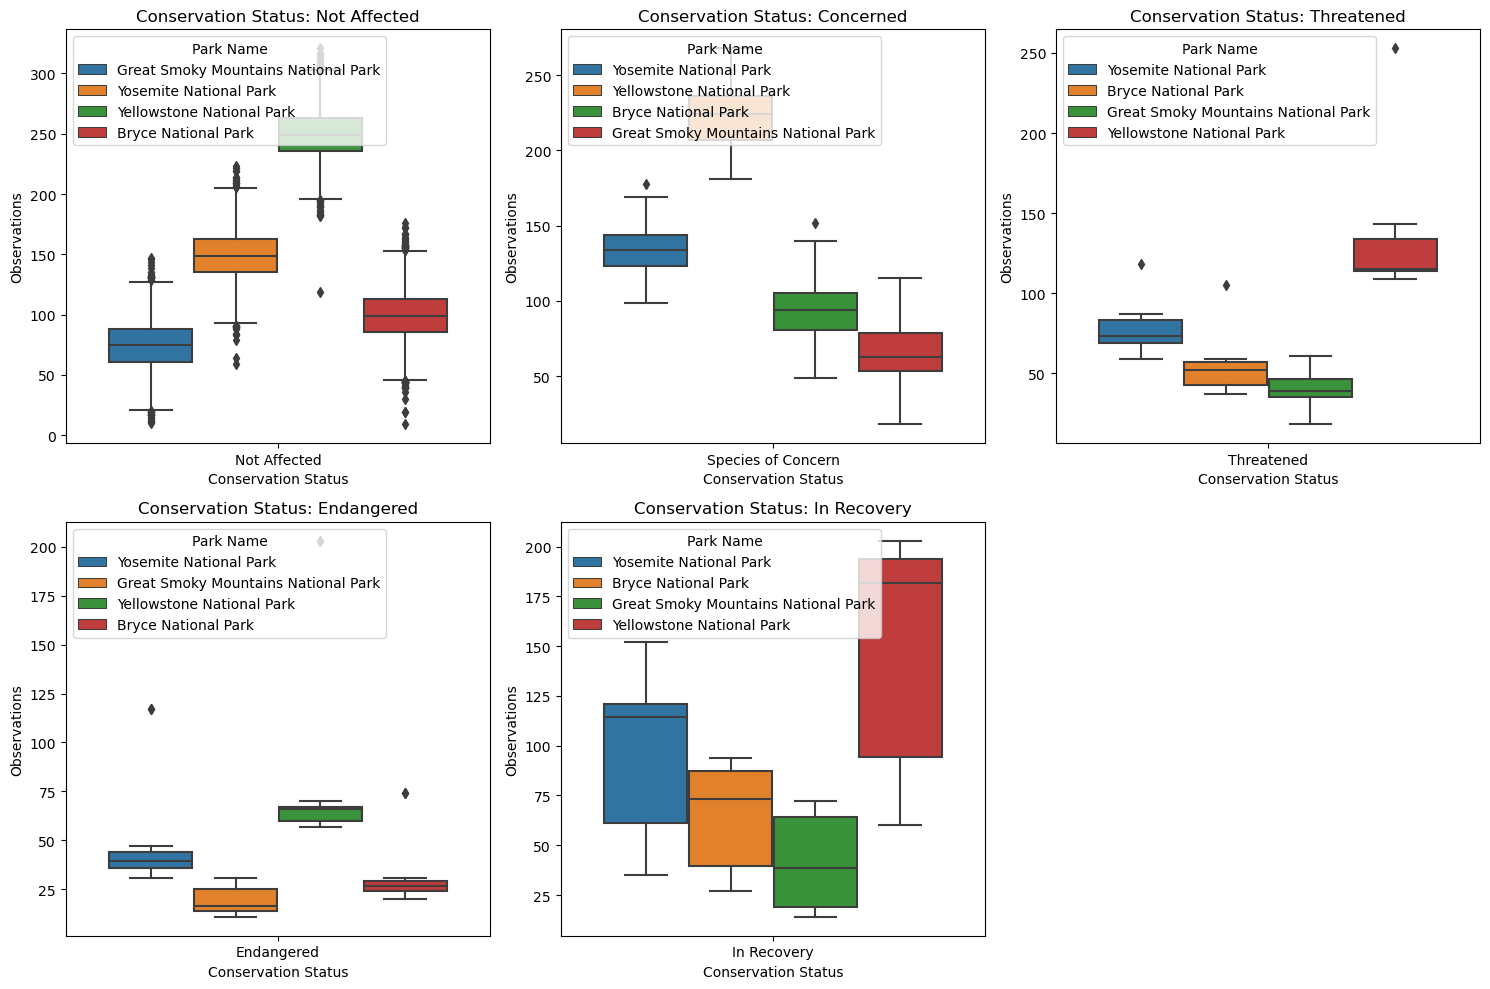

<Figure size 640x480 with 0 Axes>

In [37]:
# To check this lets add a hue

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the five boxplots
plt.subplot(2, 3, 1)
sns.boxplot(x="conservation_status", y="observations", hue = 'park_name', data=not_affected_status)
plt.title("Conservation Status: Not Affected")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")
plt.legend(title='Park Name', loc='upper left')

plt.subplot(2, 3, 2)
sns.boxplot(x="conservation_status", y="observations", hue = 'park_name', data=concern_status)
plt.title("Conservation Status: Concerned")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")
plt.legend(title='Park Name', loc='upper left')

plt.subplot(2, 3, 3)
sns.boxplot(x="conservation_status", y="observations", hue = 'park_name', data=threatened_status)
plt.title("Conservation Status: Threatened")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")
plt.legend(title='Park Name', loc='upper left')

plt.subplot(2, 3, 4)
sns.boxplot(x="conservation_status", y="observations", hue = 'park_name', data=endangered_status)
plt.title("Conservation Status: Endangered")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")
plt.legend(title='Park Name', loc='upper left')

plt.subplot(2, 3, 5)
sns.boxplot(x="conservation_status", y="observations", hue = 'park_name', data=in_recovery_status)
plt.title("Conservation Status: In Recovery")
plt.xlabel("Conservation Status")
plt.ylabel("Observations")
plt.legend(title='Park Name', loc='upper left')


plt.tight_layout()
plt.show()
plt.clf()

# Conclusions

Throughout this project, I was able to make sereval data visualizations and inferences about the different species across the four National Parks that comprised this data set.

After completing the project, we were also able to answer the questions I asked in the beginning: 
- What is the most common animal amongst the parks?
    - The most common animal amongst all the parks was Streptopelia Decaocto also known as Eurasian Collared-Dove. A Grus americana (Whooping Crane) was the least common animal. We then also found the top five most common animals for each park (seen in the first figure).
- What is the distribution of conservation status?
    - Species that were 'Not Affected' were far and away the most common, but when we remove this status, the distribution of the rest of the conservation statuses can be seen in figure two. I created a stacked bar graph so it could be seen how much each category of animal made up each conservation status.
- Are there certain species that are more likely to be endangered than another?
    - Under question three we created a column called 'percentage_at_risk'and found Mammals and Birds had the highest risk.
- Explore the relationship between number of observations and conservation status?
    - For these I created a boxplot for each unique status. Through these boxplots it was easier to compare the mean, maximum, and minimun observations. There were a few things to note. As expected, the endangered species had the lowest mean observations. Also the 'Species of Concern' mean were not too far off the mean of species that were 'Not Affected', but the maximum was higher for species that were 'Not Affected'. Overall, as I anticipated, the closer to a species was to endangerment, the less observations.